### Ships n Planes Detection

Objectives: 

First try to Detect ships. Then proceed to identify them in the "scenes" images, with bounding boxes

Then, we try to see whether our model can distinguish planes and ships? And then use planes dataset to identify planes and ships differently

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import random, os
import json

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
x = pd.read_json(r"/mnt/c/Rig/Pandora's BOX/DL/Datasets/Ships/shipsnet.json")
x

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16


In [112]:
path = r"/mnt/c/Rig/Pandora's BOX/DL/Datasets/Ships"
os.listdir(path)

['scenes', 'shipsnet', 'shipsnet.json']

In [7]:
file_path = r"/mnt/c/Rig/Pandora's BOX/DL/Datasets/Ships/shipsnet"
img_files = [os.path.join(file_path, img_path) for img_path in os.listdir(file_path)]      # paths of all images

In [118]:
rnd_imgs = random.sample(img_files, 14)


"/mnt/c/Rig/Pandora's BOX/DL/Datasets/Ships/shipsnet/0__20150718_184300_090b__-122.35324421973536_37.772113980272394.png"

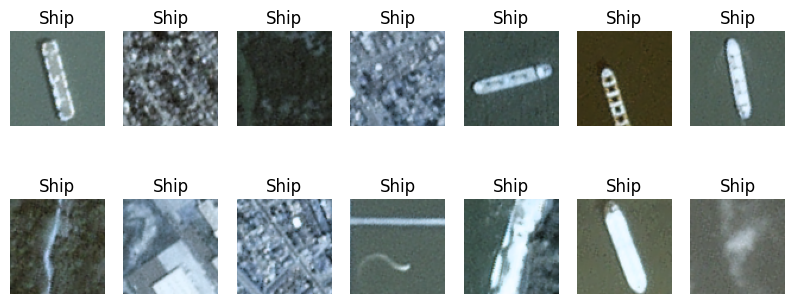

In [115]:
rnd_imgs = random.sample(img_files, 14)
plt.figure(figsize=(10,4))

for i, rnd in enumerate(rnd_imgs):
    plt.subplot(2,7,i+1)
    img = cv2.imread(rnd)
    plt.imshow(img)
    l = x["labels"].iloc[i]
    plt.title("Ship" if l==1 else "No Ship")
    plt.axis("off")
    

Some labels are incorrect as it is 

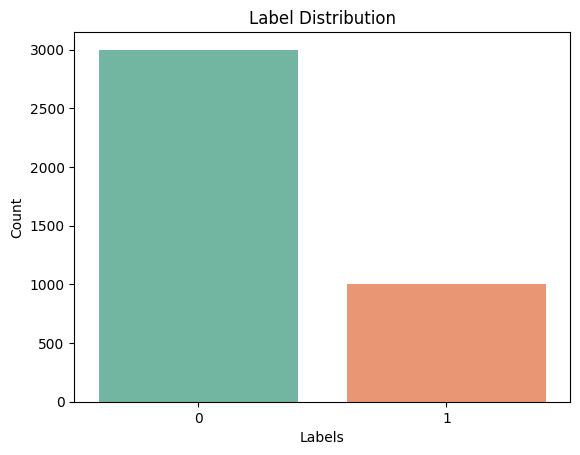

In [96]:
sns.countplot(x="labels", data=x, palette="Set2")
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

A very imbalanced dataset...

In [119]:
# Import chaalu kro,
# tf.keras. .....